In [22]:
# imports
import soundfile as sf
import librosa 
import pywt
from IPython.display import Audio
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import peakdetect

In [3]:
# functions


In [86]:
file = '../output/sr1_filtered.wav'
aud, sr = sf.read(file, stop=48000*70)

aud, sr = librosa.load(file, sr=1000, duration=70)
print(sr)

wavelets = pywt.wavedec(aud, 'db12', level=10)

# # Plot the spectrogram of wavelet coefficients
# plt.figure(figsize=(10, 16))

# level=10
# # Plot spectrogram of wavelet coefficients
# for i in range(level):
#     plt.subplot(level + 2, 1, i + 2)
#     plt.specgram(wavelets[i], Fs=1)
#     plt.title(f'Level {i} Coefficients Spectrogram')
#     plt.xlabel('Time')
#     plt.ylabel('Frequency')

# # Plot spectrogram of approximation coefficients at the highest level
# plt.subplot(level + 2, 1, level + 2)
# plt.specgram(wavelets[level], Fs=1)
# plt.title(f'Level {level} Coefficients Spectrogram')
# plt.xlabel('Time')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()
Audio(data=aud, rate=sr)


1000


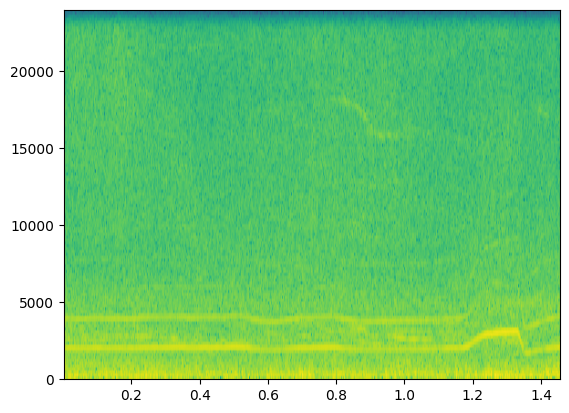

In [77]:
# plt.specgram(aud, Fs=48000)
# plt.show()

C:\Users\flori\AppData\Local\Temp\ipykernel_19988\2987629964.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


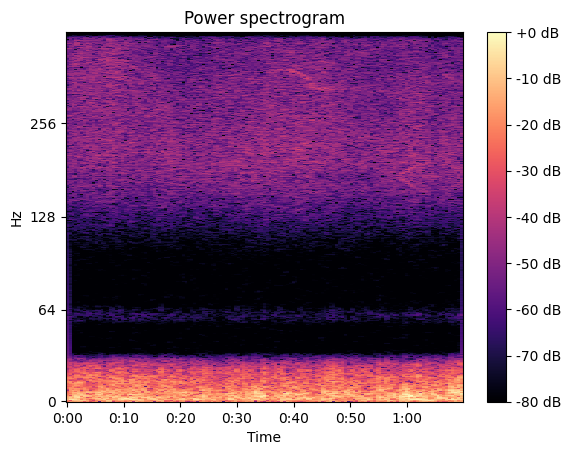

In [87]:
S = np.abs(librosa.stft(aud))
fig, ax = plt.subplots()

img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr,
                               y_axis='log', x_axis='time', ax=ax)

ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
fig.show()

In [23]:
peaks, _ = signal.find_peaks(aud)

In [27]:
print(len(aud))
print(len(peaks))
print(peaks[:30])

28800000
2174580
[ 15  19  23  40  69  92 115 139 153 169 174 176 183 216 227 242 309 314
 372 396 407 418 422 430 449 453 458 515 525 547]


In [100]:
wav_peaks = signal.find_peaks_cwt(aud, widths=[500, 1000], noise_perc=80, window_size=3000)

In [101]:
print(len(wav_peaks))
print(wav_peaks)
print(wav_peaks[:30])

38
[ 1825  3436  6451  9028 11380 13395 15903 18503 18728 21140 22592 25550
 25751 28249 28506 30639 32583 34534 36480 37916 40142 41831 43737 45400
 47473 47846 49890 51776 53209 55010 57670 59139 60849 62023 63538 64912
 67508 69268]
[ 1825  3436  6451  9028 11380 13395 15903 18503 18728 21140 22592 25550
 25751 28249 28506 30639 32583 34534 36480 37916 40142 41831 43737 45400
 47473 47846 49890 51776 53209 55010]


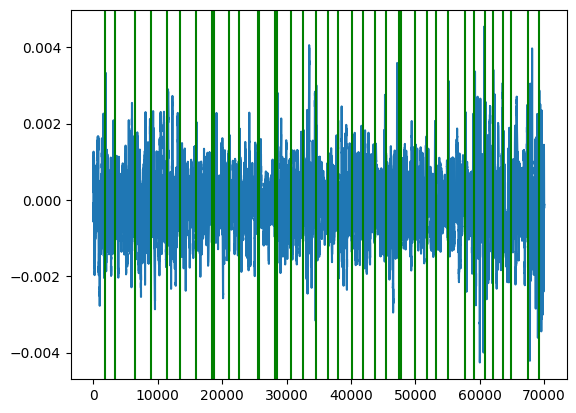

In [102]:
plt.plot(aud)
plt.yaxw
for p in wav_peaks:
    plt.axvline(p, color='green')

In [28]:
pds = peakdetect.peakdetect_spline(x_axis=range(len(aud)), y_axis=aud)

1.9906143821902906
[  524   500  6424 ...   990 16344  8177]


ValueError: False zero-crossings found, indicates problem with smoothing window or unhandled problem with offset

In [29]:
pds

NameError: name 'pds' is not defined

In [30]:
import numpy as np

np.random.seed(256)  # for reproducibility

# create time steps and corresponding sine wave with Gaussian noise
fs = 30  # sampling rate, Hz
ts = np.arange(0, 8, 1.0 / fs)  # time vector - 8 seconds

ys = np.sin(2*np.pi * 1.0 * ts)  # signal @ 1.0 Hz, without noise
yerr = 0.5 * np.random.normal(size=len(ts))  # Gaussian noise
yraw = ys + yerr


In [42]:
yraw = aud

In [43]:
sos = signal.iirfilter(4, Wn=[0.1, 2.5], fs=fs, btype="bandpass",
                             ftype="butter", output="sos")
yfilt = signal.sosfilt(sos, yraw)


In [45]:
# find peaks in smoothed signal
peaks, props = signal.find_peaks(yfilt, distance=0.35*fs, height=0.0)
# find peaks in noisy signal using wavelet decomposition
# cwt_peaks = signal.find_peaks_cwt(yraw, widths=np.arange(5, 15))


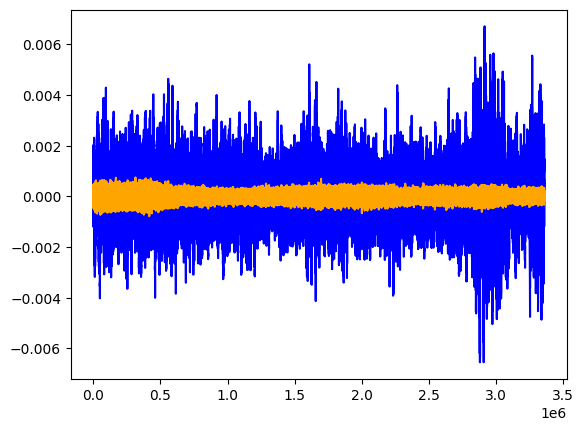

In [49]:
plt.plot(yraw, color='blue')
plt.plot(yfilt, color='orange')
# for v in peaks:
    # plt.axvline(x=v, color='green')